In [183]:
!pip install umap-learn
!pip install pca
!pip install kneed
!pip install scikit-learn
!pip install plotly

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.decomposition import PCA, IncrementalPCA
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN, MiniBatchKMeans
from sklearn.metrics import silhouette_score
from yellowbrick.cluster import KElbowVisualizer
from kneed import KneeLocator
from umap import UMAP
import umap
import plotly.express as px
from sklearn.metrics import davies_bouldin_score


###Load the CSV file into a DataFrame

In [184]:
file_path = '/content/mental-heath-in-tech-2016_20161114.csv'
df = pd.read_csv(file_path)

df.head()

,Are you self-employed?,How many employees does your company or organization have?,Is your employer primarily a tech company/organization?,Is your primary role within your company related to tech/IT?,Does your employer provide mental health benefits as part of healthcare coverage?,Do you know the options for mental health care available under your employer-provided coverage?,"Has your employer ever formally discussed mental health (for example, as part of a wellness campaign or other official communication)?",Does your employer offer resources to learn more about mental health concerns and options for seeking help?,Is your anonymity protected if you choose to take advantage of mental health or substance abuse treatment resources provided by your employer?,"If a mental health issue prompted you to request a medical leave from work, asking for that leave would be:",...,"If you have a mental health issue, do you feel that it interferes with your work when being treated effectively?","If you have a mental health issue, do you feel that it interferes with your work when NOT being treated effectively?",What is your age?,What is your gender?,What country do you live in?,What US state or territory do you live in?,What country do you work in?,What US state or territory do you work in?,Which of the following best describes your work position?,Do you work remotely?
0,0,26-100,1.0,NaN,Not eligible for coverage / N/A,NaN,No,No,I don't know,Very easy,...,Not applicable to me,Not applicable to me,39,Male,United Kingdom,NaN,United Kingdom,NaN,Back-end Developer,Sometimes
1,0,6-25,1.0,NaN,No,Yes,Yes,Yes,Yes,Somewhat easy,...,Rarely,Sometimes,29,male,United States of America,Illinois,United States of America,Illinois,Back-end Developer|Front-end Developer,Never
2,0,6-25,1.0,NaN,No,NaN,No,No,I don't know,Neither easy nor difficult,...,Not applicable to me,Not applicable to me,38,Male,United Kingdom,NaN,United Kingdom,NaN,Back-end Developer,Always
3,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Sometimes,Sometimes,43,male,United Kingdom,NaN,United Kingdom,NaN,Supervisor/Team Lead,Sometimes
4,0,6-25,0.0,1.0,Yes,Yes,No,No,No,Neither easy nor difficult,...,Sometimes,Sometimes,43,Female,United States of America,Illinois,United States of America,Illinois,Executive Leadership|Supervisor/Team Lead|Dev ...,Sometimes


###Handling Missing Data

The dataset contains a significant number of missing values (NaNs). Let's investigate the extent of missing data in each column:

In [185]:
df.isna().sum()

Are you self-employed?                                                                  0
How many employees does your company or organization have?                            287
Is your employer primarily a tech company/organization?                               287
Is your primary role within your company related to tech/IT?                         1170
Does your employer provide mental health benefits as part of healthcare coverage?     287
                                                                                     ... 
What US state or territory do you live in?                                            593
What country do you work in?                                                            0
What US state or territory do you work in?                                            582
Which of the following best describes your work position?                               0
Do you work remotely?                                                                   0
Length: 63

###Renaming Columns for Clarity
To make the dataset easier to work with and more readable, we will rename the columns with more descriptive names. This will help in better understanding the data and simplify the analysis process.

In [186]:
dict_new_columns_alternate = {
    'Are you self-employed?': 'Self_Employed',
    'How many employees does your company or organization have?': 'Employee_Count',
    'Is your employer primarily a tech company/organization?': 'Tech_Company',
    'Does your employer provide mental health benefits as part of healthcare coverage?': 'Mental_Health_Benefits',
    'Do you know the options for mental health care available under your employer-provided coverage?': 'MH_Coverage_Options',
    'Has your employer ever formally discussed mental health (for example, as part of a wellness campaign or other official communication)?': 'Employer_MH_Discussion',
    'Does your employer offer resources to learn more about mental health concerns and options for seeking help?': 'Employer_MH_Resources',
    'Is your anonymity protected if you choose to take advantage of mental health or substance abuse treatment resources provided by your employer?': 'Anonymity_Protection',
    'If a mental health issue prompted you to request a medical leave from work, asking for that leave would be:': 'Medical_Leave_Request',
    'Do you think that discussing a mental health disorder with your employer would have negative consequences?': 'MH_Discussion_Consequences',
    'Would you feel comfortable discussing a mental health disorder with your coworkers?': 'Comfort_MH_Discussion_Coworkers',
    'Would you feel comfortable discussing a mental health disorder with your direct supervisor(s)?': 'Comfort_MH_Discussion_Supervisors',
    'Do you feel that your employer takes mental health as seriously as physical health?': 'MH_vs_PH_Importance',
    'Have you heard of or observed negative consequences for co-workers who have been open about mental health issues in your workplace?': 'Negative_Consequences_Coworkers',
    'Do you feel that being identified as a person with a mental health issue would hurt your career?': 'MH_Career_Impact',
    'Do you think that team members/co-workers would view you more negatively if they knew you suffered from a mental health issue?': 'Negative_View_Coworkers',
    'How willing would you be to share with friends and family that you have a mental illness?': 'Willingness_Share_Family_Friends',
    'Have you observed or experienced an unsupportive or badly handled response to a mental health issue in your current or previous workplace?': 'Observed_Unsupportive_Response',
    'Do you have a family history of mental illness?': 'Family_History_MH',
    'Have you had a mental health disorder in the past?': 'Past_MH_Disorder',
    'Do you currently have a mental health disorder?': 'Current_MH_Disorder',
    'Have you been diagnosed with a mental health condition by a medical professional?': 'MH_Diagnosed_Professional',
    'Have you ever sought treatment for a mental health issue from a mental health professional?': 'Sought_MH_Treatment',
    'What is your age?': 'Age',
    'What is your gender?': 'Gender',
    'What country do you live in?': 'Country',
    'What US state or territory do you live in?': 'US_State',
    'What country do you work in?': 'Work_Country',
    'What US state or territory do you work in?': 'Work_US_State',
    'Which of the following best describes your work position?': 'Work_Position',
    'Do you work remotely?': 'Remote_Work',
    'Do you think that discussing a physical health issue with your employer would have negative consequences?': 'PH_Discussion_Consequences',
    'Do you have previous employers?': 'Previous_Employers',
    'Have your previous employers provided mental health benefits?': 'Previous_MH_Benefits',
    'Were you aware of the options for mental health care provided by your previous employers?': 'Awareness_Previous_MH_Options',
    'Did your previous employers ever formally discuss mental health (as part of a wellness campaign or other official communication)?': 'Previous_MH_Discussion',
    'Did your previous employers provide resources to learn more about mental health issues and how to seek help?': 'Previous_MH_Resources',
    'Was your anonymity protected if you chose to take advantage of mental health or substance abuse treatment resources with previous employers?': 'Previous_Anonymity_Protection',
    'Do you think that discussing a mental health disorder with previous employers would have negative consequences?': 'Previous_MH_Discussion_Consequences',
    'Do you think that discussing a physical health issue with previous employers would have negative consequences?': 'Previous_PH_Discussion_Consequences',
    'Would you have been willing to discuss a mental health issue with your previous co-workers?': 'Comfort_Previous_MH_Discussion_Coworkers',
    'Would you have been willing to discuss a mental health issue with your direct supervisor(s)?': 'Comfort_Previous_MH_Discussion_Supervisors',
    'Did you feel that your previous employers took mental health as seriously as physical health?': 'Previous_MH_vs_PH_Importance',
    'Did you hear of or observe negative consequences for co-workers with mental health issues in your previous workplaces?': 'Previous_Negative_Consequences_Coworkers',
    'Would you be willing to bring up a physical health issue with a potential employer in an interview?': 'PH_Issue_Interview',
    'Why or why not?': 'Why_Not',
    'Would you bring up a mental health issue with a potential employer in an interview?': 'MH_Issue_Interview',
    'Why or why not?.1': 'Why_Not_1',
    'Have your observations of how another individual who discussed a mental health disorder made you less likely to reveal a mental health issue yourself in your current workplace?': 'Less_Likely_Reveal_MH_After_Observation',
    'If you have a mental health issue, do you feel that it interferes with your work when being treated effectively?': 'MH_Interference_Effective_Treatment',
    'If you have a mental health issue, do you feel that it interferes with your work when NOT being treated effectively?': 'MH_Interference_Untreated'
}

df.rename(columns=dict_new_columns_alternate, inplace=True)


###Dropping Columns with Excessive Missing Values
To clean the dataset, we will drop columns that have 500 or more missing values. This will help us focus on the more complete and potentially useful parts of the data.

In [187]:
cols_to_drop = df.columns[df.isna().sum() >= 500]


df.drop(cols_to_drop, axis=1, inplace=True)


print("Number of remaining columns:", len(df.columns))


Number of remaining columns: 48


In [188]:
df.describe()

,Self_Employed,Tech_Company,Previous_Employers,Sought_MH_Treatment,Age
count,1433.000000,1146.000000,1433.000000,1433.000000,1433.000000
mean,0.200279,0.770506,0.882066,0.585485,34.286113
std,0.400349,0.420691,0.322643,0.492810,11.290931
min,0.000000,0.000000,0.000000,0.000000,3.000000
25%,0.000000,1.000000,1.000000,0.000000,28.000000
50%,0.000000,1.000000,1.000000,1.000000,33.000000
75%,0.000000,1.000000,1.000000,1.000000,39.000000
max,1.000000,1.000000,1.000000,1.000000,323.000000


###Cleaning Age Data
To address unrealistic age values such as 3 or 323 years, we will replace these values with the median age of respondents falling within a typical working age range (18 to 75 years).

In [189]:
median_age = df[(df['Age'] >= 18) & (df['Age'] <= 75)]['Age'].median()
print("Median Age:", median_age)
df.loc[(df['Age'] < 18) | (df['Age'] > 75), 'Age'] = median_age

Median Age: 33.0


###Analyzing Unique Values in Columns
To assess the uniqueness of values in each column and potentially decide which columns to retain or drop based on the number of unique values:

In [190]:
unique_values_per_column = df.nunique()

print("Number of unique values for each column:")
print(unique_values_per_column)

Number of unique values for each column:
Self_Employed                                    2
Employee_Count                                   6
Tech_Company                                     2
Mental_Health_Benefits                           4
MH_Coverage_Options                              3
Employer_MH_Discussion                           3
Employer_MH_Resources                            3
Anonymity_Protection                             3
Medical_Leave_Request                            6
MH_Discussion_Consequences                       3
PH_Discussion_Consequences                       3
Comfort_MH_Discussion_Coworkers                  3
Comfort_MH_Discussion_Supervisors                3
MH_vs_PH_Importance                              3
Negative_Consequences_Coworkers                  2
Previous_Employers                               2
Previous_MH_Benefits                             4
Awareness_Previous_MH_Options                    4
Previous_MH_Discussion                   

I want to drop some columns from the dataset because they contain too many unique values. This can make these columns less useful for analysis or modeling purposes, as having a large number of unique values may lead to sparse or noisy data that doesn't contribute significantly to insights or predictions.

In [191]:
feature = ['Why_Not', 'Why_Not_1']
df.drop([i for i in feature], axis = 1, inplace = True)

###Investigating Gender Distribution

In [192]:
df['Gender'].value_counts()

Gender
Male           610
male           249
Female         153
female          95
M               86
              ... 
cis male         1
Human            1
Genderfluid      1
Enby             1
MALE             1
Name: count, Length: 70, dtype: int64

###Standardizing Gender Responses
To standardize the responses in the 'Gender' column by grouping similar categories together, use replacement technique.

In [193]:
df['Gender'] = df['Gender'].replace([
    'male', 'Male ', 'M', 'm', 'man', 'Cis male',
    'Male.', 'Male (cis)', 'Man', 'Sex is male',
    'cis male', 'Malr', 'Dude', "I'm a man why didn't you make this a drop down question. You should of asked sex? And I would of answered yes please. Seriously how much text can this take? ",
    'mail', 'M|', 'male ', 'Cis Male', 'Male (trans, FtM)',
    'cisdude', 'cis man', 'MALE'], 'Male')
df['Gender'] = df['Gender'].replace([
    'female', 'I identify as female.', 'female ',
    'Female assigned at birth ', 'F', 'Woman', 'fm', 'f',
    'Cis female', 'Transitioned, M2F', 'Female or Multi-Gender Femme',
    'Female ', 'woman', 'female/woman', 'Cisgender Female',
    'mtf', 'fem', 'Female (props for making this a freeform field, though)',
    ' Female', 'Cis-woman', 'AFAB', 'Transgender woman',
    'Cis female '], 'Female')
df['Gender'] = df['Gender'].replace([
    'Bigender', 'non-binary,', 'Genderfluid (born female)',
    'Other/Transfeminine', 'Androgynous', 'male 9:1 female, roughly',
    'nb masculine', 'genderqueer', 'Human', 'Genderfluid',
    'Enby', 'genderqueer woman', 'Queer', 'Agender', 'Fluid',
    'Genderflux demi-girl', 'female-bodied; no feelings about gender',
    'non-binary', 'Male/genderqueer', 'Nonbinary', 'Other', 'none of your business',
    'Unicorn', 'human', 'Genderqueer'], 'Other')

###"Visualizing Gender Distribution"

As observed in the histogram, the number of men is significantly larger than that of women. This is typical in the IT sector, where more men are employed.

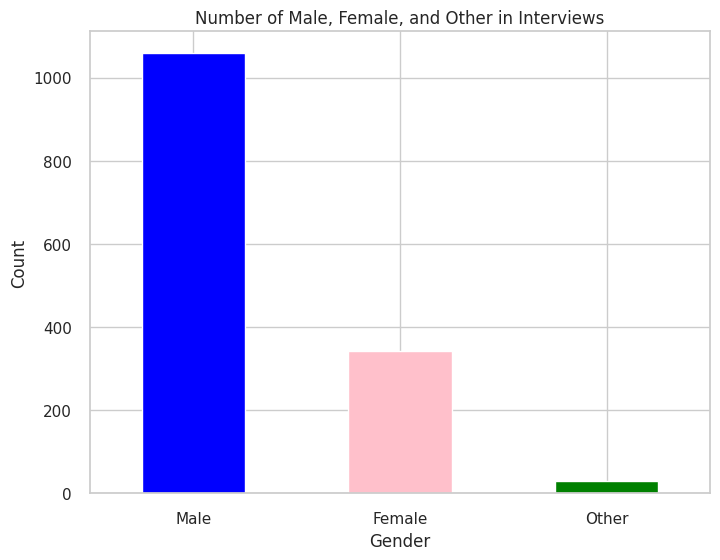

In [194]:
gender_counts = df['Gender'].value_counts()

# Create the histogram
plt.figure(figsize=(8, 6))
gender_counts.plot(kind='bar', color=['blue', 'pink', 'green'])
plt.title('Number of Male, Female, and Other in Interviews')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

In [195]:
df['Gender'].isna().sum()

3

Replace 3 NaN values in 'Gender' column with 'Male'

In [196]:
df['Gender'] = df['Gender'].replace(np.NaN, 'Male')

The first question is crucial for analysis because a "yes" response (1) indicates that subsequent questions, which are not designed for self-employed individuals, may not be answered accurately.

In [197]:
df['Self_Employed'].value_counts()

Self_Employed
0    1146
1     287
Name: count, dtype: int64

This code removes rows where respondents identified as self-employed (value 1), as their answers may not align with those from individuals in traditional employment settings, impacting the analysis.

In [198]:
df = df[df['Self_Employed'] != 1]

The 'Self Employed' column is removed from the DataFrame because it has only one unique value.

In [199]:
df.drop(columns=['Self_Employed'], inplace=True)

<ipython-input-199-02865dde684e>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [200]:
df.isna().sum()

Employee_Count                                  0
Tech_Company                                    0
Mental_Health_Benefits                          0
MH_Coverage_Options                           133
Employer_MH_Discussion                          0
Employer_MH_Resources                           0
Anonymity_Protection                            0
Medical_Leave_Request                           0
MH_Discussion_Consequences                      0
PH_Discussion_Consequences                      0
Comfort_MH_Discussion_Coworkers                 0
Comfort_MH_Discussion_Supervisors               0
MH_vs_PH_Importance                             0
Negative_Consequences_Coworkers                 0
Previous_Employers                              0
Previous_MH_Benefits                          131
Awareness_Previous_MH_Options                 131
Previous_MH_Discussion                        131
Previous_MH_Resources                         131
Previous_Anonymity_Protection                 131


###Replace all other missing values with the most frequent value in each column

In [201]:
mode_imputer = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
mode_imputer.fit(df)
imputed_data = mode_imputer.transform(df)
imputed_df = pd.DataFrame(data=imputed_data, columns=df.columns)

In [202]:
imputed_df.isnull().sum().sum()

0

In [203]:
job_roles = imputed_df['Work_Position'].unique()
job_roles

array(['Back-end Developer', 'Back-end Developer|Front-end Developer',
       'Executive Leadership|Supervisor/Team Lead|Dev Evangelist/Advocate|DevOps/SysAdmin|Support|Back-end Developer|Front-end Developer',
       'DevOps/SysAdmin|Support|Back-end Developer|Front-end Developer|Designer',
       'Dev Evangelist/Advocate|Back-end Developer',
       'Support|Back-end Developer|One-person shop',
       'Front-end Developer', 'Executive Leadership',
       'Supervisor/Team Lead|Dev Evangelist/Advocate|Back-end Developer|Front-end Developer',
       'DevOps/SysAdmin|Back-end Developer|Front-end Developer',
       'Designer', 'Other|Executive Leadership', 'Other',
       'Supervisor/Team Lead|Support|Back-end Developer',
       'Supervisor/Team Lead|DevOps/SysAdmin|Back-end Developer',
       'Other|Supervisor/Team Lead|Support|Back-end Developer|Designer',
       'Supervisor/Team Lead|Back-end Developer',
       'One-person shop|Front-end Developer|Back-end Developer|Dev Evangelist/Advoca

In [204]:
job_roles = imputed_df['Work_Position'].unique()

job_categories = {
    "IT Development": ["developer", "front", "back"],
    "Management": ["supervisor", "team lead", "lead", "leadership"],
    "DevOps": ["devops", "sysadmin"],
    "Advocacy": ["evangelist", "advocate"],
    "Support": ["support"],
    "Design": ["design"],
    "Sales": ["sales"],
    "Other": ["other"],
    "One-person shop": ["one person shop"],
    "HR": ["hr"]
}


def categorize_job_position(position):
    position_lower = position.lower()
    for category, keywords in job_categories.items():
        if any(keyword in position_lower for keyword in keywords):
            return category
    return "Other"


imputed_df['Work_Position'] = imputed_df['Work_Position'].apply(categorize_job_position)


job_position_counts = imputed_df['Work_Position'].value_counts()
print(job_position_counts)


Work_Position
IT Development    755
Management        126
Other             105
DevOps             62
Support            39
Advocacy           33
Design             18
HR                  4
Sales               4
Name: count, dtype: int64


###Encode categorical columns using LabelEncoder

In [205]:
country_counts = imputed_df['Country'].value_counts()
country_counts1 = imputed_df['Work_Country'].value_counts()
imputed_df['Country'] = imputed_df['Country'].apply(lambda x: x if country_counts[x] >= 40 else 'Other')
imputed_df['Work_Country'] = imputed_df['Work_Country'].apply(lambda x: x if country_counts1[x] >= 40 else 'Other')

In [206]:
imputed_df_for_fraph = imputed_df.copy()

In [207]:
imputed_df_for_fraph['Country'].value_counts()

Country
United States of America    709
Other                       196
United Kingdom              134
Canada                       63
Germany                      44
Name: count, dtype: int64

In [208]:
imputed_df_for_fraph

,Employee_Count,Tech_Company,Mental_Health_Benefits,MH_Coverage_Options,Employer_MH_Discussion,Employer_MH_Resources,Anonymity_Protection,Medical_Leave_Request,MH_Discussion_Consequences,PH_Discussion_Consequences,...,MH_Diagnosed_Professional,Sought_MH_Treatment,MH_Interference_Effective_Treatment,MH_Interference_Untreated,Age,Gender,Country,Work_Country,Work_Position,Remote_Work
0,26-100,1.0,Not eligible for coverage / N/A,No,No,No,I don't know,Very easy,No,No,...,Yes,0,Not applicable to me,Not applicable to me,39,Male,United Kingdom,United Kingdom,IT Development,Sometimes
1,6-25,1.0,No,Yes,Yes,Yes,Yes,Somewhat easy,No,No,...,Yes,1,Rarely,Sometimes,29,Male,United States of America,United States of America,IT Development,Never
2,6-25,1.0,No,No,No,No,I don't know,Neither easy nor difficult,Maybe,No,...,No,1,Not applicable to me,Not applicable to me,38,Male,United Kingdom,United Kingdom,IT Development,Always
3,6-25,0.0,Yes,Yes,No,No,No,Neither easy nor difficult,Yes,Maybe,...,Yes,1,Sometimes,Sometimes,43,Female,United States of America,United States of America,IT Development,Sometimes
4,More than 1000,1.0,Yes,I am not sure,No,Yes,Yes,Somewhat easy,Yes,Yes,...,No,1,Not applicable to me,Often,42,Male,United Kingdom,United Kingdom,IT Development,Sometimes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1141,100-500,1.0,I don't know,I am not sure,No,I don't know,I don't know,Somewhat easy,Maybe,No,...,Yes,1,Rarely,Often,26,Female,Canada,Canada,Other,Sometimes
1142,500-1000,1.0,Yes,No,No,No,Yes,Somewhat easy,No,No,...,Yes,1,Rarely,Often,38,Female,United States of America,United States of America,Support,Always
1143,100-500,1.0,Yes,Yes,Yes,Yes,I don't know,Somewhat difficult,Maybe,Maybe,...,Yes,1,Rarely,Sometimes,52,Male,United States of America,United States of America,IT Development,Sometimes
1144,100-500,0.0,I don't know,I am not sure,No,Yes,I don't know,Somewhat difficult,Maybe,No,...,Yes,0,Sometimes,Often,30,Female,United States of America,United States of America,DevOps,Sometimes


In [209]:
labeled_df = imputed_df.copy()

le = LabelEncoder()

for column in labeled_df.columns:
    if labeled_df[column].dtype == 'object':
        labeled_df[column] = le.fit_transform(labeled_df[column].astype(str))

labeled_df.head()

,Employee_Count,Tech_Company,Mental_Health_Benefits,MH_Coverage_Options,Employer_MH_Discussion,Employer_MH_Resources,Anonymity_Protection,Medical_Leave_Request,MH_Discussion_Consequences,PH_Discussion_Consequences,...,MH_Diagnosed_Professional,Sought_MH_Treatment,MH_Interference_Effective_Treatment,MH_Interference_Untreated,Age,Gender,Country,Work_Country,Work_Position,Remote_Work
0,2,1,2,1,1,1,0,5,1,1,...,1,0,1,1,20,1,3,3,4,2
1,4,1,1,2,2,2,2,3,1,1,...,1,1,3,4,10,1,4,4,4,1
2,4,1,1,1,1,1,0,1,0,1,...,0,1,1,1,19,1,3,3,4,0
3,4,0,3,2,1,1,1,1,2,0,...,1,1,4,4,24,0,4,4,4,2
4,5,1,3,0,1,2,2,3,2,2,...,0,1,1,2,23,1,3,3,4,2


###Visualizing Correlation Matrix of Encoded Data

The matrix provides insights into the relationships between different features, helping to identify potential patterns or dependencies among variables.

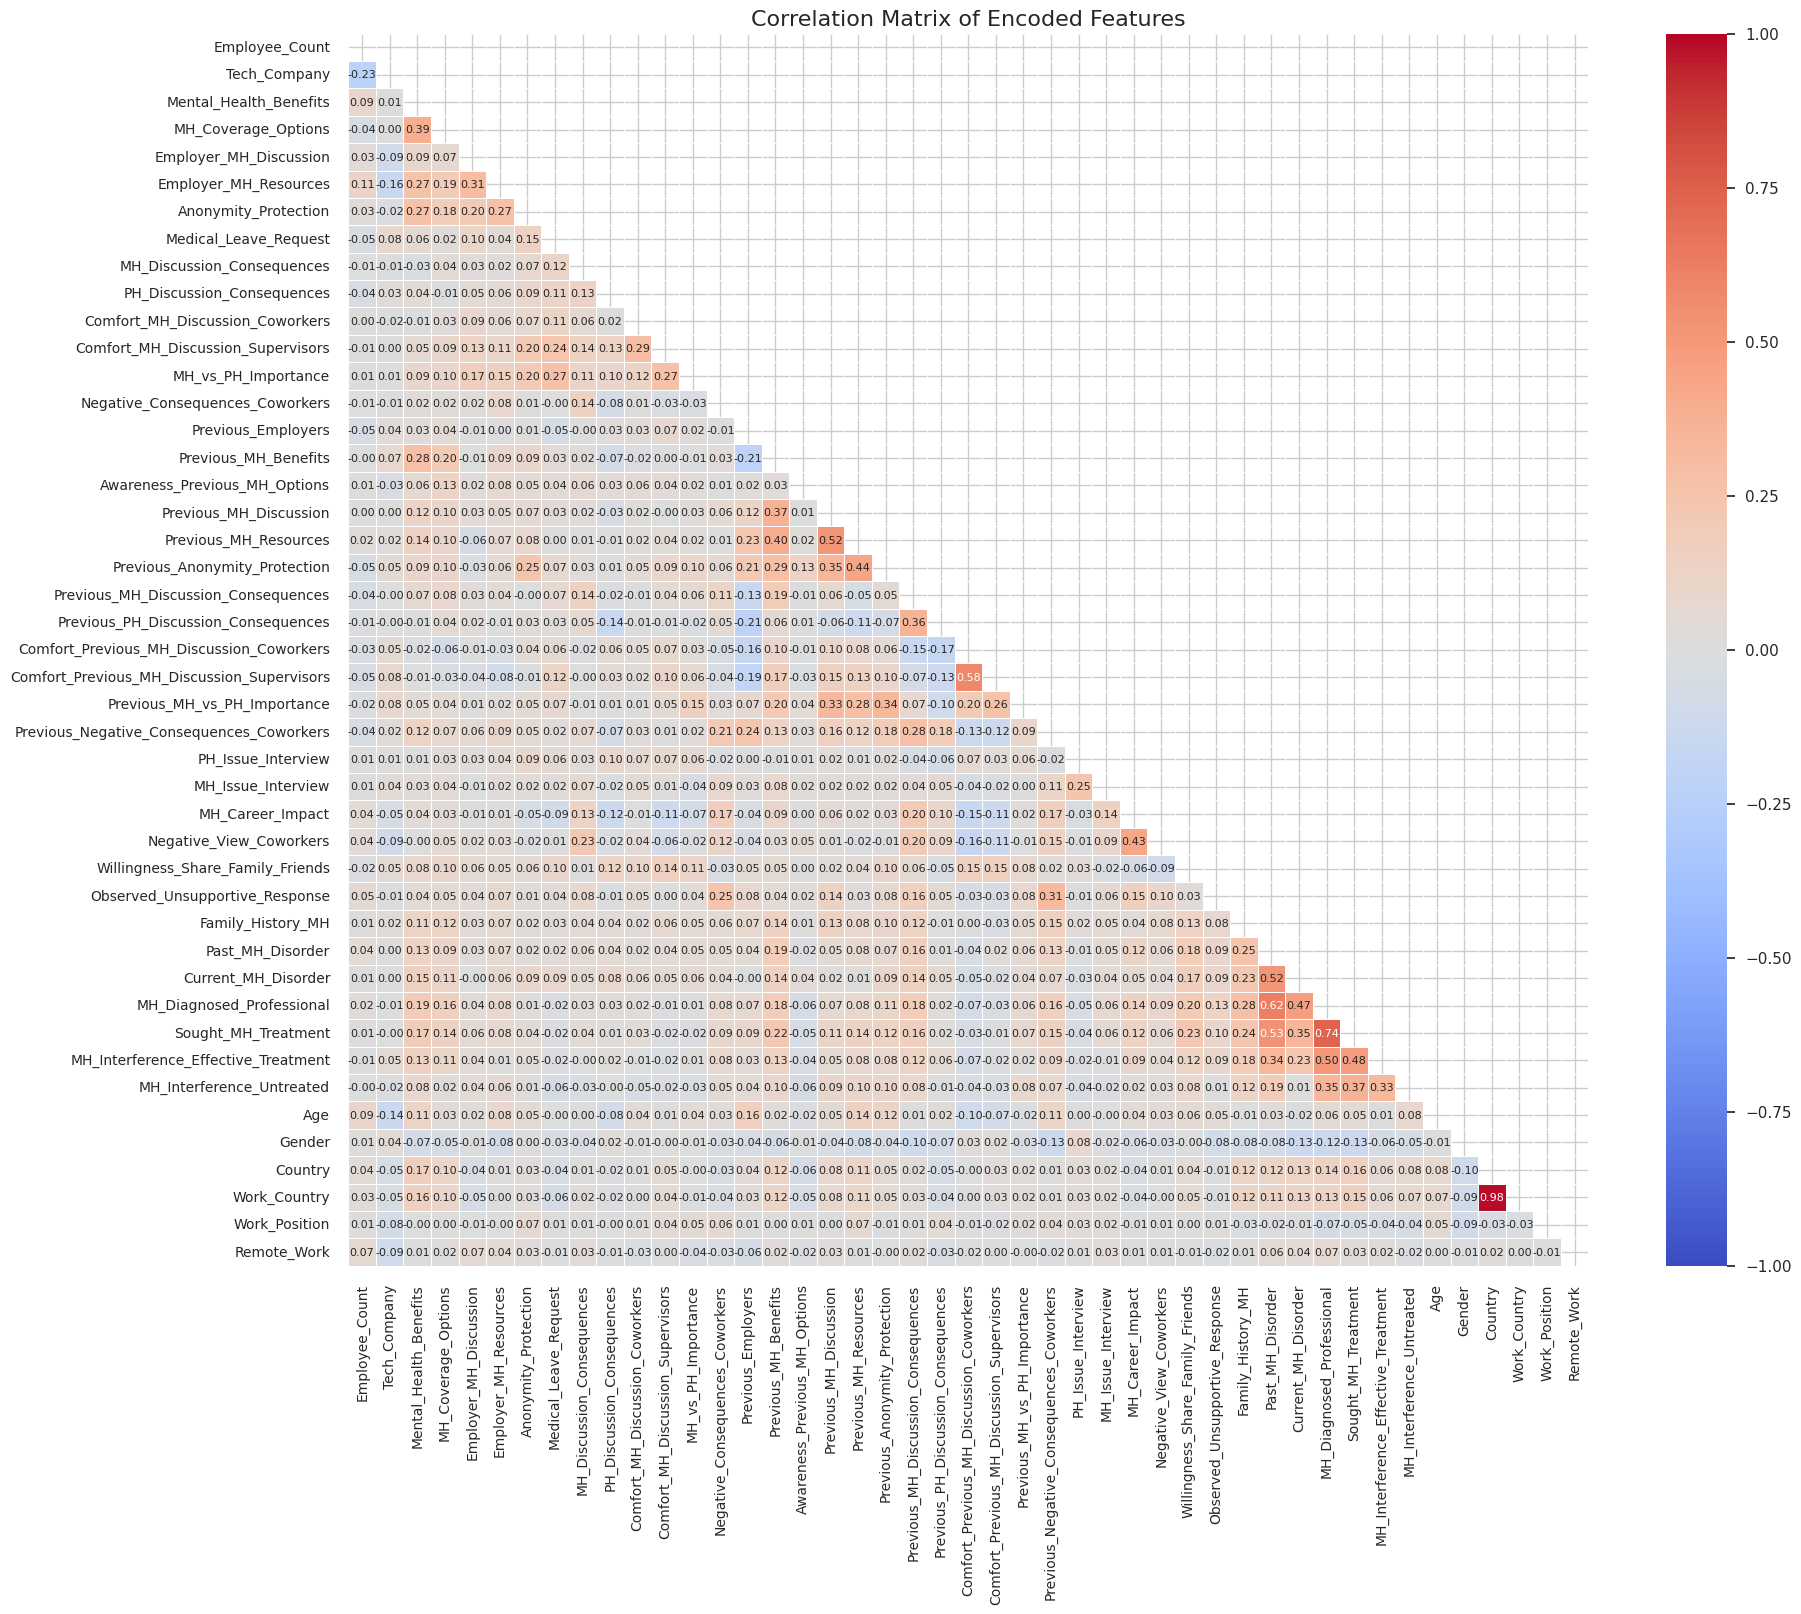

In [210]:
# Compute the correlation matrix
corr_matrix = labeled_df.corr()

# Create a mask to hide the upper triangle (redundant information)
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

# Set up the figure size and style
plt.figure(figsize=(20, 16))
sns.set(style='whitegrid')  # Adjust style to white background with grid lines

# Plot the heatmap
sns.heatmap(corr_matrix, mask=mask, cmap='coolwarm', vmin=-1, vmax=1, annot=True, fmt=".2f",
            annot_kws={'size': 8}, linewidths=0.5)

# Customize labels, title, and ticks
plt.title('Correlation Matrix of Encoded Features', fontsize=16)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

# Display the plot
plt.show()


###Identifying Highly Correlated Feature Pairs

Highly correlated features may indicate redundancy or similarity in information content. Such pairs are removed to facilitate further analysis,to avoid redundant information in subsequent modeling or analysis tasks.

In [211]:
high_corr_pairs = []

for i in range(len(corr_matrix.columns)):
    for j in range(i + 1, len(corr_matrix.columns)):
        if abs(corr_matrix.iloc[i, j]) > 0.70:
            high_corr_pairs.append((corr_matrix.columns[i], corr_matrix.columns[j], corr_matrix.iloc[i, j]))

for pair in high_corr_pairs:
    print(f"Features {pair[0]} and {pair[1]} have a correlation coefficient of {pair[2]:.2f}")

Features MH_Diagnosed_Professional and Sought_MH_Treatment have a correlation coefficient of 0.74
Features Country and Work_Country have a correlation coefficient of 0.98


In [212]:
corr_matrix = labeled_df.corr()
threshold = 0.7

for i in range(len(corr_matrix.columns)):
    for j in range(i):
        if abs(corr_matrix.iloc[i, j]) > threshold:
            labeled_df.drop(columns=[corr_matrix.columns[i], corr_matrix.columns[j]], inplace=True)

labeled_df.shape

(1146, 41)

###Analysis of Mental Health Disorders Across Genders in Tech Companies

<ipython-input-213-8cf8b6e82b43>:9: UserWarning:

The palette list has more values (10) than needed (3), which may not be intended.

<ipython-input-213-8cf8b6e82b43>:10: UserWarning:

The palette list has more values (10) than needed (3), which may not be intended.



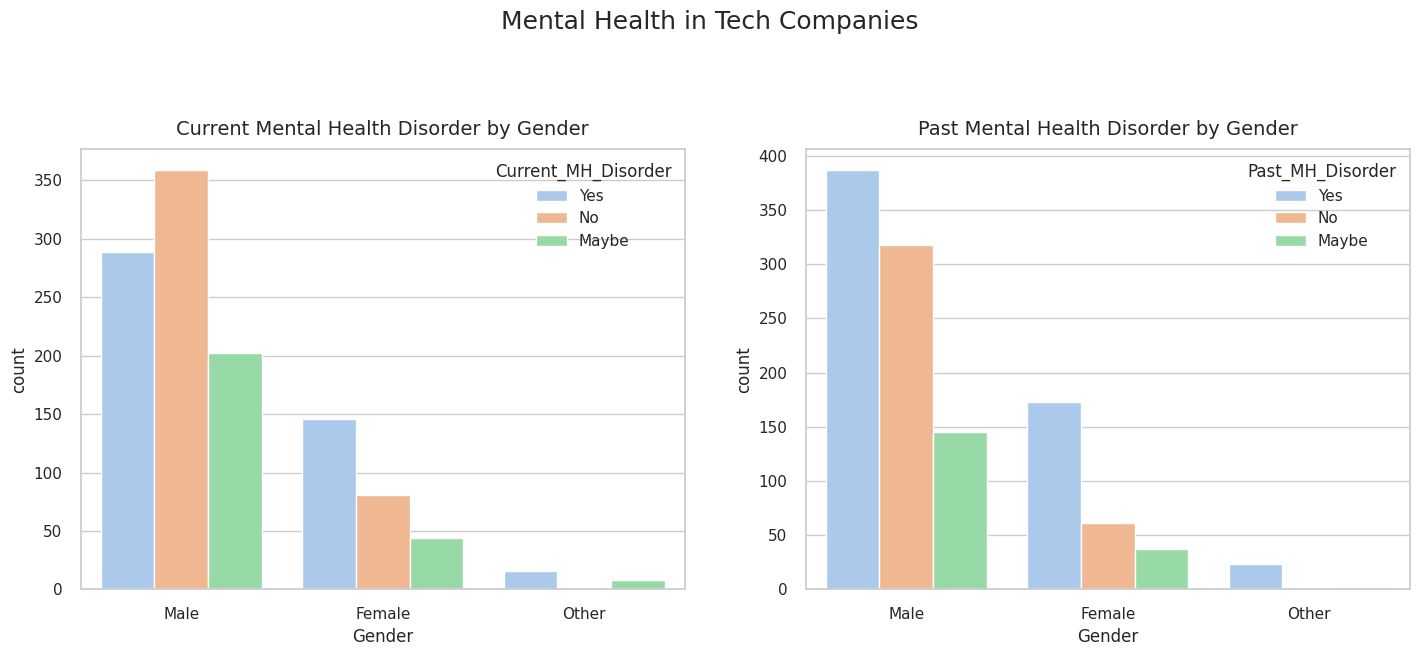

In [213]:
fig, ax = plt.subplots(1, 2, sharex=True, figsize=(15, 7))
fig.suptitle('Mental Health in Tech Companies', fontsize=18)

ax[0].set_title('Current Mental Health Disorder by Gender', pad=10, fontsize=14)
ax[1].set_title('Past Mental Health Disorder by Gender', pad=10, fontsize=14)

palette = sns.color_palette("pastel")

sns.countplot(ax=ax[0], x=imputed_df["Gender"], hue=imputed_df['Current_MH_Disorder'], hue_order=['Yes', 'No', 'Maybe'], palette=palette)
sns.countplot(ax=ax[1], x=imputed_df["Gender"], hue=imputed_df['Past_MH_Disorder'], hue_order=['Yes', 'No', 'Maybe'], palette=palette)

plt.tight_layout(pad=3)
plt.show()

<ipython-input-214-6434ec9de5b7>:8: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


<ipython-input-214-6434ec9de5b7>:14: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




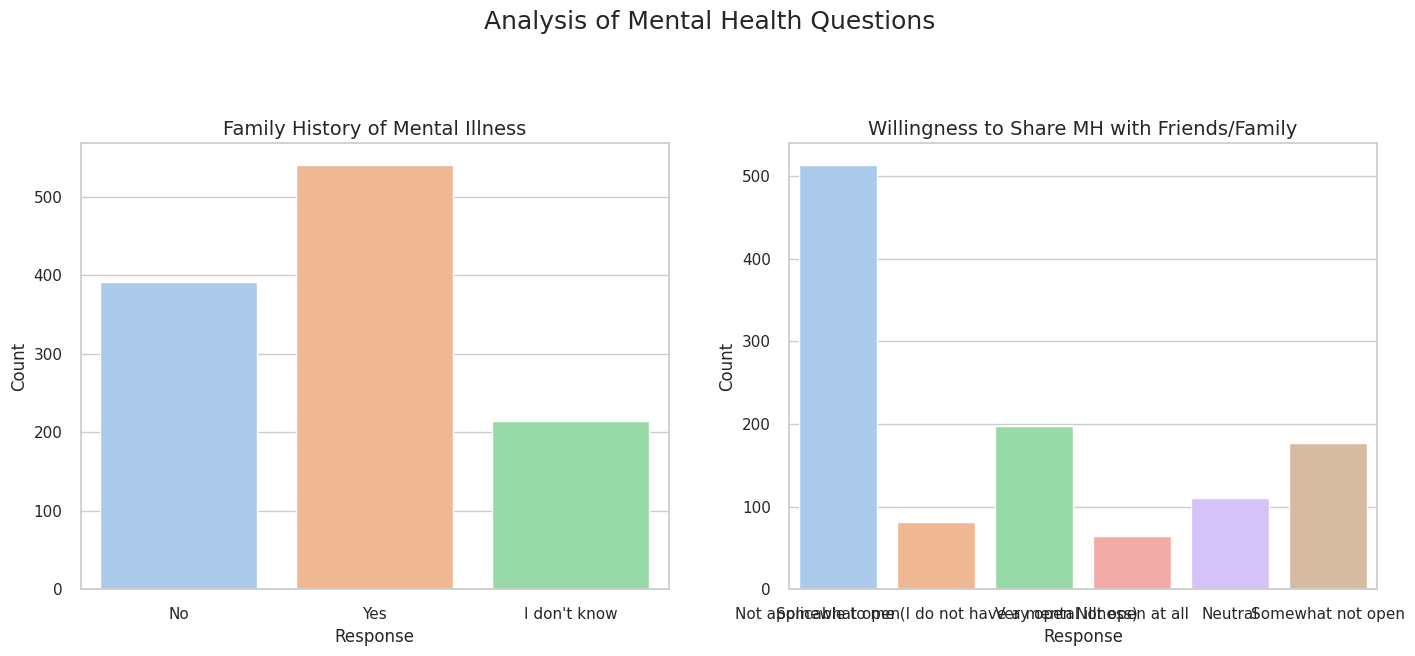

In [214]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define the figure and axes
fig, axs = plt.subplots(1, 2, figsize=(15, 7))
fig.suptitle('Analysis of Mental Health Questions', fontsize=18)

sns.countplot(ax=axs[0], x=imputed_df['Family_History_MH'], palette='pastel')

axs[0].set_title('Family History of Mental Illness', fontsize=14)
axs[0].set_xlabel('Response')
axs[0].set_ylabel('Count')

sns.countplot(ax=axs[1], x=imputed_df['Willingness_Share_Family_Friends'], palette='pastel')

axs[1].set_title('Willingness to Share MH with Friends/Family', fontsize=14)
axs[1].set_xlabel('Response')
axs[1].set_ylabel('Count')

plt.tight_layout(pad=3)
plt.show()



<ipython-input-215-b4b7222e5f66>:20: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


<ipython-input-215-b4b7222e5f66>:27: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




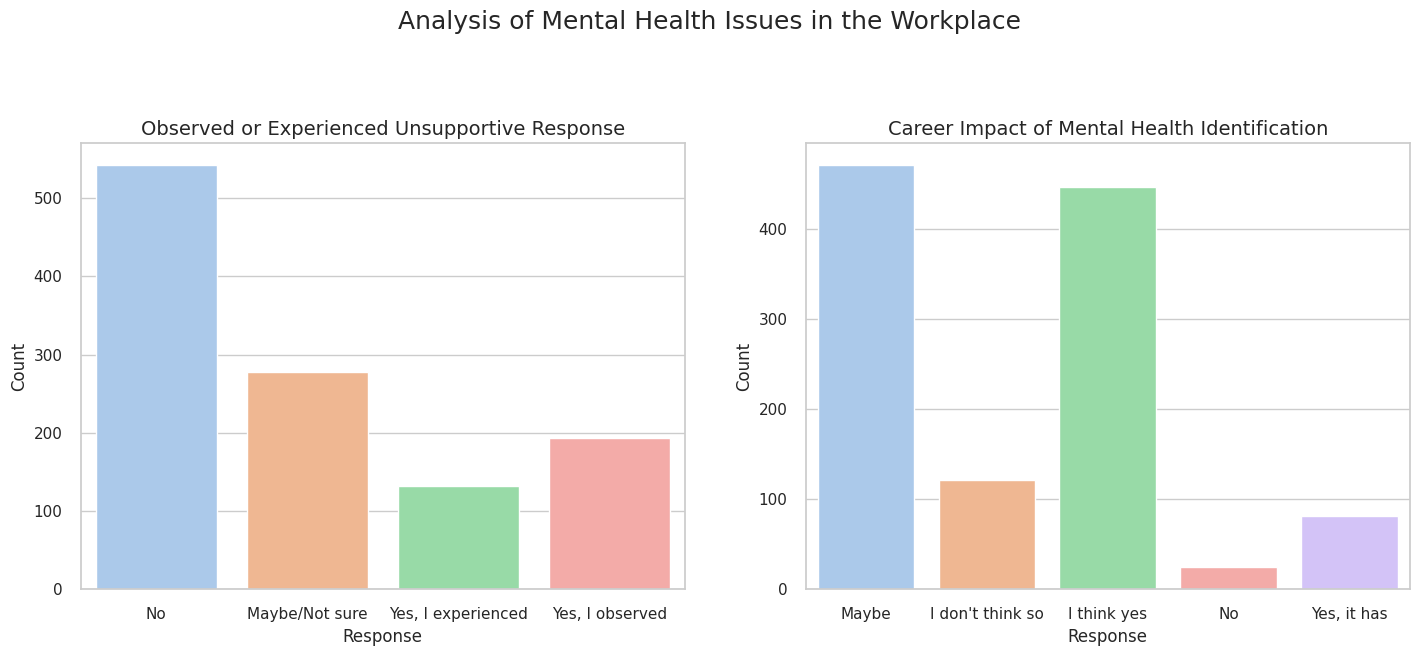

In [215]:
import matplotlib.pyplot as plt
import seaborn as sns

to_replace_observed = ["Yes, I experienced", "Maybe/Not sure", "Yes, I observed"]
new_values_observed = ["Yes, I experienced", "Maybe/Not sure", "Yes, I observed"]

for i in range(len(to_replace_observed)):
    imputed_df['Observed_Unsupportive_Response'].replace(to_replace_observed[i], new_values_observed[i], inplace=True)

to_replace_career = ["Yes, I think it would", "No, it has not", "No, I don't think it would"]
new_values_career = ["I think yes", "No", "I don't think so"]

for i in range(len(to_replace_career)):
    imputed_df['MH_Career_Impact'].replace(to_replace_career[i], new_values_career[i], inplace=True)


fig, axs = plt.subplots(1, 2, figsize=(15, 7))
fig.suptitle('Analysis of Mental Health Issues in the Workplace', fontsize=18)

sns.countplot(ax=axs[0], x=imputed_df['Observed_Unsupportive_Response'], palette='pastel')

axs[0].set_title('Observed or Experienced Unsupportive Response', fontsize=14)
axs[0].set_xlabel('Response')
axs[0].set_ylabel('Count')


sns.countplot(ax=axs[1], x=imputed_df['MH_Career_Impact'], palette='pastel')

axs[1].set_title('Career Impact of Mental Health Identification', fontsize=14)
axs[1].set_xlabel('Response')
axs[1].set_ylabel('Count')


plt.tight_layout(pad=3)
plt.show()


The data in 'labeled_df' is standardized using StandardScaler, which transforms each feature. Such that its distribution has a mean of 0 and a standard deviation of 1. That assume normally distributed data or require features to be on the same scale.


In [216]:
scaler = StandardScaler()

labeled_df_scaled_array = scaler.fit_transform(labeled_df)

labeled_df_scaled = pd.DataFrame(labeled_df_scaled_array, columns=labeled_df.columns)

labeled_df_scaled.head()

,Employee_Count,Tech_Company,Mental_Health_Benefits,MH_Coverage_Options,Employer_MH_Discussion,Employer_MH_Resources,Anonymity_Protection,Medical_Leave_Request,MH_Discussion_Consequences,PH_Discussion_Consequences,...,Observed_Unsupportive_Response,Family_History_MH,Past_MH_Disorder,Current_MH_Disorder,MH_Interference_Effective_Treatment,MH_Interference_Untreated,Age,Gender,Work_Position,Remote_Work
0,-0.484969,0.545755,0.215133,0.051851,-0.210071,0.029792,-0.710293,1.456790,0.309091,0.412669,...,-0.210739,-0.375515,0.880482,-0.224631,-0.816542,-1.011417,0.742056,0.465979,-0.121998,0.844117
1,0.750085,0.545755,-0.555311,1.372334,1.685532,1.395467,1.538314,0.237746,0.309091,0.412669,...,-0.210739,0.940509,0.880482,1.082104,0.614280,1.547267,-0.574959,0.465979,-0.121998,-0.442264
2,0.750085,0.545755,-0.555311,0.051851,-0.210071,0.029792,-0.710293,-0.981299,-1.022556,0.412669,...,-1.217021,-0.375515,-1.821077,-0.224631,-0.816542,-1.011417,0.610355,0.465979,-0.121998,-1.728644
3,0.750085,-1.832325,0.985577,1.372334,-0.210071,0.029792,0.414011,-0.981299,1.640738,-1.670674,...,0.795542,0.940509,0.880482,1.082104,1.329691,1.547267,1.268863,-1.704802,-0.121998,0.844117
4,1.367613,0.545755,0.985577,-1.268631,-0.210071,1.395467,1.538314,0.237746,1.640738,2.496013,...,0.795542,-0.375515,-0.470298,1.082104,-0.816542,-0.158522,1.137161,0.465979,-0.121998,0.844117


###Dimensionality reduction
PCA is commonly used for dimensionality reduction by capturing the most important patterns or features in the data while reducing its dimensionality.

In [217]:
pca = PCA(svd_solver='randomized', random_state=42).fit(labeled_df_scaled)
exp = pca.explained_variance_ratio_
exp

array([0.08573568, 0.06453452, 0.05266933, 0.04501618, 0.04267928,
       0.03912655, 0.03388061, 0.0322606 , 0.02921601, 0.0286015 ,
       0.02799796, 0.02641109, 0.02548966, 0.02419396, 0.02370276,
       0.02314303, 0.02301771, 0.02231398, 0.02157587, 0.02114684,
       0.02037943, 0.01959198, 0.01909779, 0.01864909, 0.01795526,
       0.01766126, 0.01714667, 0.01610478, 0.01546295, 0.0152885 ,
       0.0150896 , 0.01454387, 0.01336631, 0.01317612, 0.01257529,
       0.01219917, 0.01128287, 0.01035174, 0.00970837, 0.00912963,
       0.00852618])

Visualize the cumulative explained variance ratio as a function of the number of principal components.

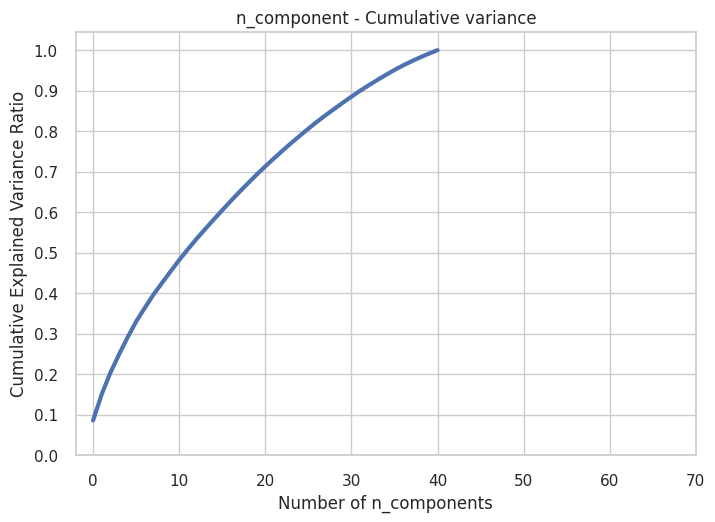

In [218]:

plt.plot(np.cumsum(exp), linewidth=3)
plt.title('n_component - Cumulative variance')
plt.xlabel('Number of n_components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.xticks(range(0, 80, 10))
plt.yticks(np.arange(0, 1.1, 0.1))
plt.show()

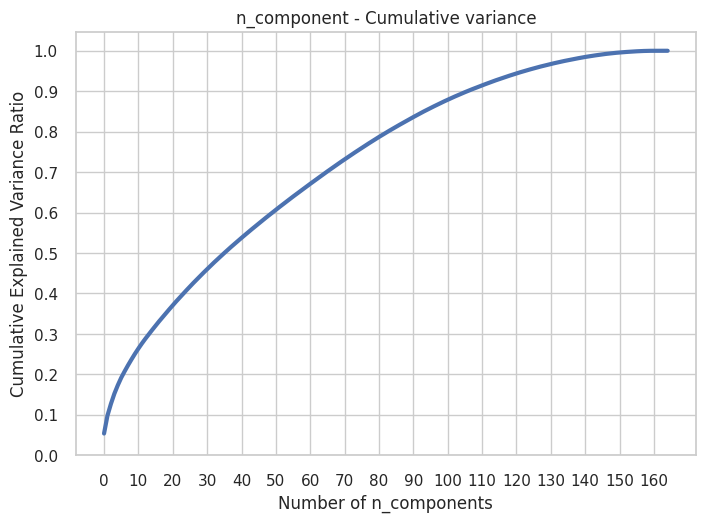

In [219]:
encoded_df = imputed_df.copy()

for column in encoded_df.columns:
    if encoded_df[column].dtype == 'object':
        dummies = pd.get_dummies(encoded_df[column], prefix=column, drop_first=True)
        dummies = dummies.astype(int)
        encoded_df = pd.concat([encoded_df.drop(column, axis=1), dummies], axis=1)


scaler = StandardScaler()

encoded_df_scaled_array = scaler.fit_transform(encoded_df)


encoded_df_scaled = pd.DataFrame(encoded_df_scaled_array, columns=encoded_df.columns)


pca = PCA(svd_solver='randomized', random_state=42).fit(encoded_df_scaled)
exp1 = pca.explained_variance_ratio_
exp1


plt.plot(np.cumsum(exp1), linewidth=3)
plt.title('n_component - Cumulative variance')
plt.xlabel('Number of n_components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.xticks(range(0, 170, 10))
plt.yticks(np.arange(0, 1.1, 0.1))
plt.show()

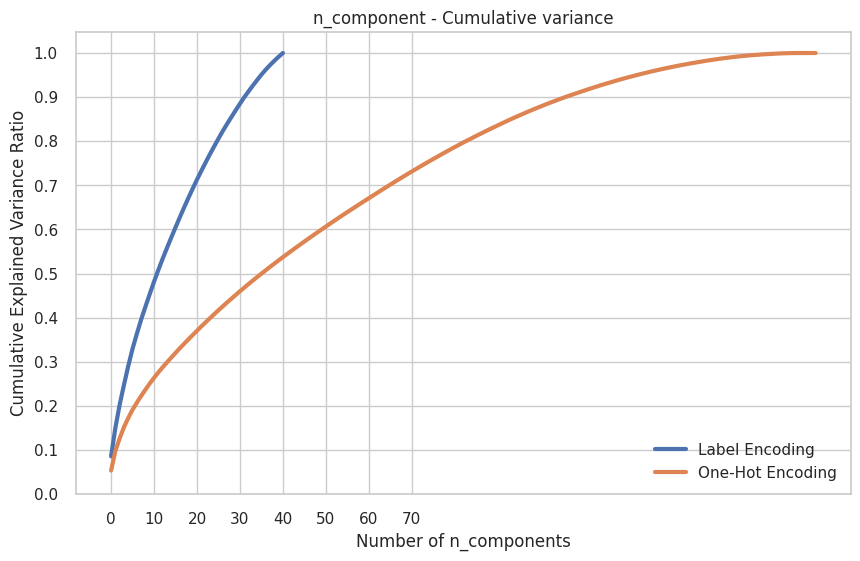

In [220]:

plt.figure(figsize=(10, 6))

plt.plot(np.cumsum(exp), linewidth=3, label='Label Encoding')

plt.plot(np.cumsum(exp1), linewidth=3, label='One-Hot Encoding')

plt.title('n_component - Cumulative variance')
plt.xlabel('Number of n_components')
plt.ylabel('Cumulative Explained Variance Ratio')

plt.xticks(range(0, 80, 10))
plt.yticks(np.arange(0, 1.1, 0.1))


plt.grid(True)

plt.legend()
plt.show()


In [221]:
pca_final = IncrementalPCA(n_components=3)


In [222]:
df_pca_fin = pca_final.fit_transform(labeled_df_scaled)
df_pca_fin.shape

(1146, 3)

Creating correlation matrix for the principal components

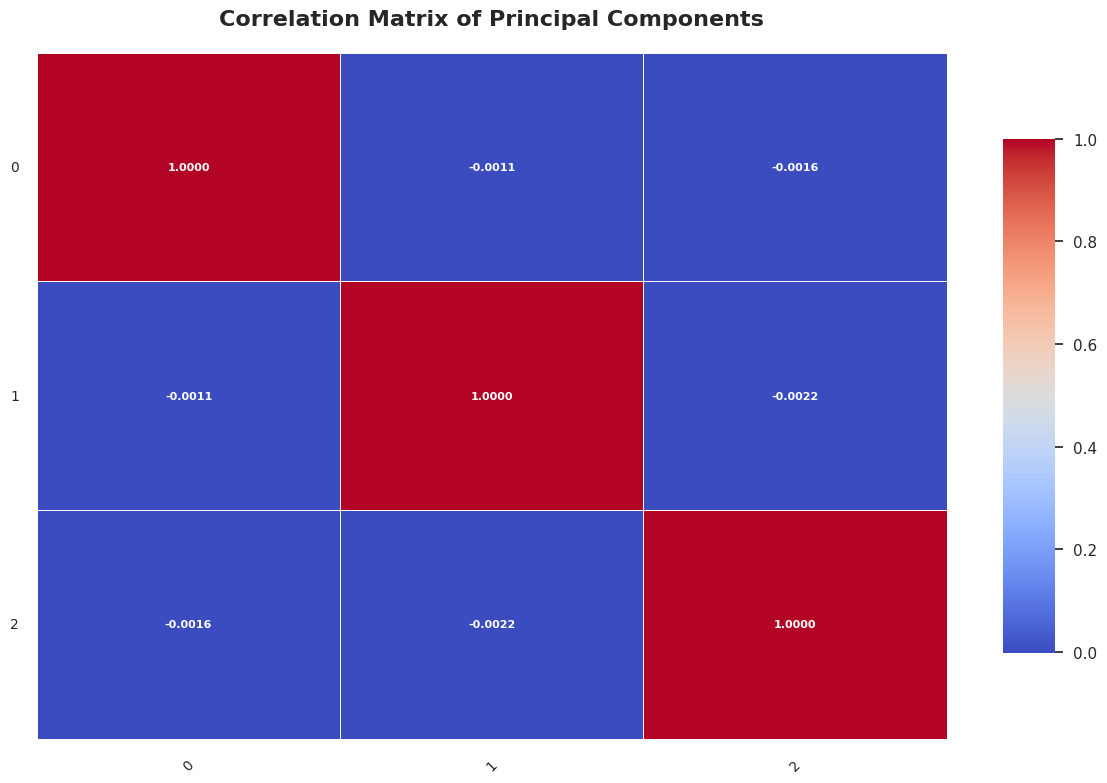

In [223]:
pc = np.transpose(df_pca_fin)
corrmat = np.corrcoef(pc)

plt.figure(figsize=(12, 8))

sns.heatmap(
    corrmat,
    annot=True,
    cmap='coolwarm',
    fmt='.4f',
    linewidths=0.5,
    linecolor='white',
    annot_kws={"size": 8, "weight": "bold"},
    cbar_kws={"shrink": 0.75, "aspect": 10}
)

plt.title('Correlation Matrix of Principal Components', fontsize=16, fontweight='bold', pad=20)
plt.xticks(fontsize=10, rotation=45)
plt.yticks(fontsize=10, rotation=0)
plt.tight_layout()

plt.show()


In [224]:
labeled_df_scaled1 = pd.DataFrame({
    'PC1':pc[0],
    'PC2':pc[1],
    'PC3':pc[2]
})
labeled_df_scaled1

,PC1,PC2,PC3
0,-1.816400,0.636190,1.537182
1,3.153981,1.204233,0.971389
2,-2.285698,-0.097284,-0.890407
3,2.368553,-2.533515,-0.369909
4,1.274477,-1.561905,2.535798
...,...,...,...
1141,-1.567487,-0.486270,-1.315400
1142,2.601535,-0.064732,2.063933
1143,3.383643,-1.706539,-1.182221
1144,-0.687684,-1.348340,0.774102


###K-Means clustering
This code performs a K-Means clustering analysis on a standardized dataset to determine the optimal number of clusters using the "elbow method." The elbow method is a heuristic used to identify the appropriate number of clusters in a dataset by plotting the within-cluster sum of squares (inertia) against the number of clusters.

In [225]:

kmeans_set = {
    'n_init': 10,
    'max_iter':300,
}
list_kmeans = []
for k in range(2, 10) :
    kmeans = KMeans(random_state = 42, n_clusters=k, **kmeans_set)
    kmeans.fit(labeled_df_scaled1)
    list_kmeans.append(kmeans.inertia_)

In [226]:
k1 = KneeLocator(range(2, 10), list_kmeans, curve='convex', direction='decreasing')
k1.elbow

4

The elbow point suggests that the optimal number of clusters is 4, as it is the point where adding another cluster does not significantly decrease the inertia.

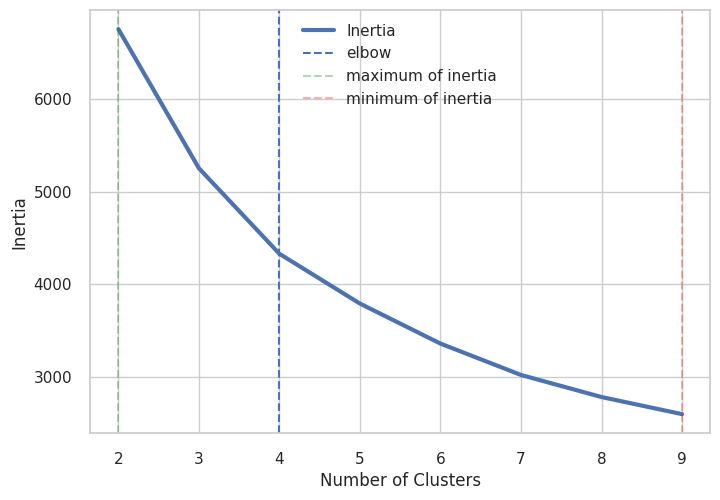

In [227]:
k1 = KneeLocator(range(2, 10), list_kmeans, curve='convex', direction='decreasing')
k1.elbow
plt.plot(range(2, 10), list_kmeans, linewidth=3, label='Inertia')
plt.axvline(x=k1.elbow, ls='--', label='elbow')
plt.axvline(x=list_kmeans.index(max(list_kmeans))+2, alpha=0.3, ls='--',  label='maximum of inertia', color='green')
plt.axvline(x=list_kmeans.index(min(list_kmeans))+2, alpha=0.3, ls='--',  label='minimum of inertia', color='red')

plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.legend()
plt.show()

Determine the optimal number of clusters for K-Means clustering using the silhouette coefficient. The silhouette coefficient measures how similar an object is to its own cluster compared to other clusters, providing an indication of how well the clusters are separated.

Based on the silhouette coefficient analysis, the optimal number of clusters for this dataset is 3

Best Silhouette_score :  0.2780843352396047
Best n_cluster :  3


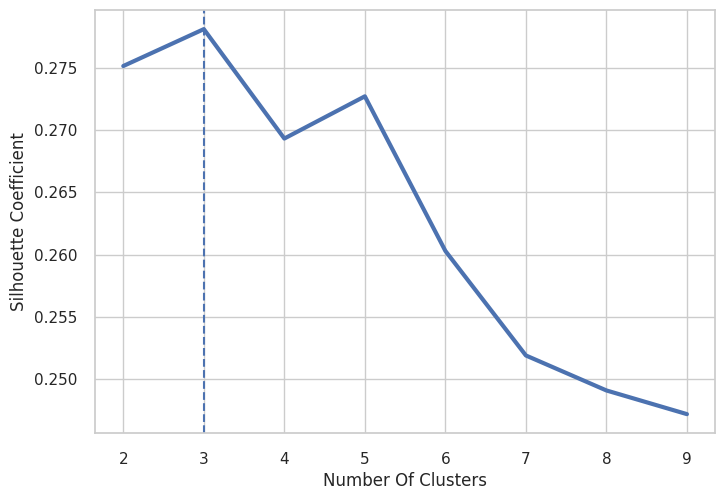

In [228]:
kmeans_sil_score = 0
kmeans_sil_n = 0
silhouette_coefficient = []
for k in range(2, 10) :
    kmeans = KMeans(random_state = 42, n_clusters=k, **kmeans_set).fit(labeled_df_scaled1)
    score = silhouette_score(labeled_df_scaled1, kmeans.labels_)
    silhouette_coefficient.append(score)
    if score > kmeans_sil_score :
        kmeans_sil_score = score
        kmeans_sil_n = k
    else :
        continue
print('Best Silhouette_score : ', kmeans_sil_score)
print('Best n_cluster : ', kmeans_sil_n)

plt.plot(range(2, 10), silhouette_coefficient, linewidth=3)
plt.xticks(range(2, 10))
plt.axvline(x=kmeans_sil_n, ls='--', label='best')
plt.xlabel('Number Of Clusters')
plt.ylabel('Silhouette Coefficient')
plt.show()

This code evaluates the optimal number of clusters for K-Means clustering using the Calinski-Harabasz Index, also known as the Variance Ratio Criterion. The Calinski-Harabasz score assesses the ratio of the sum of between-cluster dispersion and of within-cluster dispersion for all clusters. A higher score indicates better-defined clusters.

Based on the Calinski-Harabasz Index analysis, the optimal number of clusters for this dataset is 2.

calinski_harabasz_score :  459.97952141254996
Best n_cluster :  2


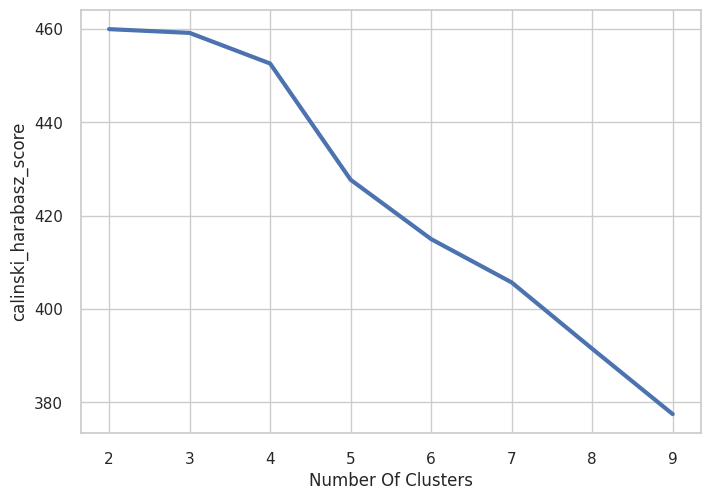

In [229]:
from sklearn.metrics import calinski_harabasz_score

kmeans_ch_score = 0
kmeans_ch_n = 0
calinski_coefficient = []
for k in range(2, 10) :
    kmeans = KMeans(random_state = 47, n_clusters=k, **kmeans_set).fit(labeled_df_scaled1)
    score = calinski_harabasz_score(labeled_df_scaled1, kmeans.labels_)
    calinski_coefficient.append(score)
    if score > kmeans_ch_score :
        kmeans_ch_score = score
        kmeans_ch_n = k
    else :
        continue
print('calinski_harabasz_score : ', kmeans_ch_score)
print('Best n_cluster : ', kmeans_ch_n)

plt.plot(range(2, 10), calinski_coefficient, linewidth=3)
plt.xticks(range(2, 10))
plt.xlabel('Number Of Clusters')
plt.ylabel('calinski_harabasz_score')
plt.show()

This code evaluates the optimal number of clusters for MiniBatch K-Means clustering using the Davies-Bouldin Index. The Davies-Bouldin score is a measure of the average similarity ratio of each cluster with its most similar cluster. Lower scores indicate better clustering quality, as it means the clusters are well-separated and compact.

Based on the Davies-Bouldin Index analysis using MiniBatch K-Means clustering, the optimal number of clusters for this dataset is 4.

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change fr

davies_bouldin_score: 1.1259523570322179
Best n_clusters: 4


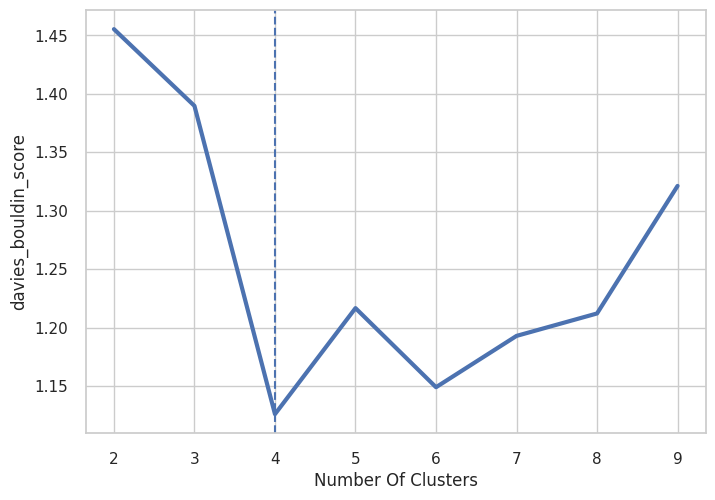

In [230]:
mini_davies_score = 100
mini_davies_n = 100
mini_davies_coef = []

for k in range(2, 10):
    mini = MiniBatchKMeans(n_clusters=k, random_state=99)
    mini.fit(labeled_df_scaled1)
    score = davies_bouldin_score(labeled_df_scaled1, mini.labels_)
    mini_davies_coef.append(score)
    if score < mini_davies_score:
        mini_davies_score = score
        mini_davies_n = k

print('davies_bouldin_score:', mini_davies_score)
print('Best n_clusters:', mini_davies_n)

plt.plot(range(2, 10), mini_davies_coef, linewidth=3)
plt.xticks(range(2, 10))
plt.xlabel('Number Of Clusters')
plt.ylabel('davies_bouldin_score')
plt.axvline(x=mini_davies_n, ls='--', label='best')
plt.show()

mini_davies_score = max(mini_davies_coef)

This code performs K-Means clustering on a dataset that has been reduced to three principal components, and visualizes the resulting clusters in a 3D plot. The goal is to identify and illustrate the groupings of the data points according to the K-Means algorithm.

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



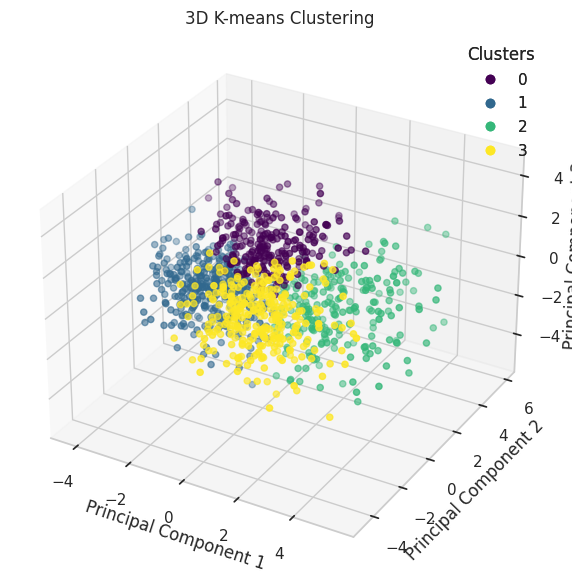

In [231]:
df = labeled_df_scaled1

kmeans = KMeans(n_clusters=4, random_state=42)

kmeans.fit(df)

labels = kmeans.labels_

fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

scatter = ax.scatter(df.iloc[:, 0], df.iloc[:, 1], df.iloc[:, 2], c=labels, cmap='viridis')

ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')
ax.set_title('3D K-means Clustering')

legend = ax.legend(*scatter.legend_elements(), title="Clusters")
ax.add_artist(legend)

plt.show()

This code performs dimensionality reduction on a scaled dataset using Incremental PCA to reduce it to 2 principal components.

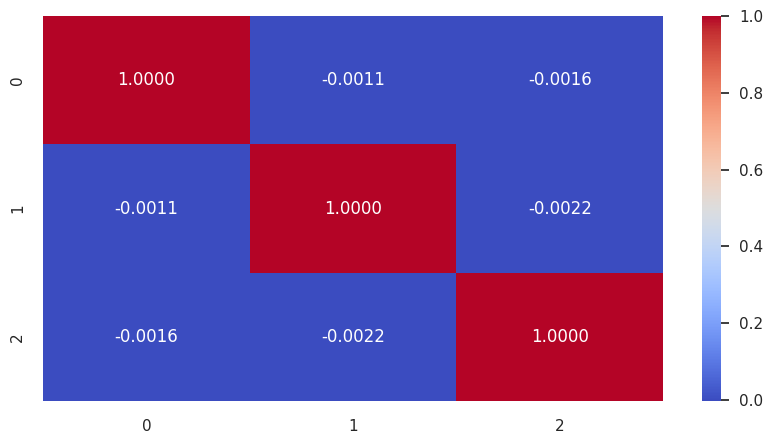

,PC1,PC2
0,-1.700381,0.671740
1,3.217257,1.232678
2,-2.347294,-0.125431
3,2.345377,-2.526454
4,1.457285,-1.520320
...,...,...
1141,-1.651359,-0.506588
1142,2.736825,0.002439
1143,3.292214,-1.723595
1144,-0.625527,-1.325606


In [232]:
pca_final_2d = IncrementalPCA(n_components=2)
df_pca_fin1 = pca_final_2d.fit_transform(labeled_df_scaled)
pc1 = np.transpose(df_pca_fin1)
corrmat = np.corrcoef(pc)
plt.figure(figsize = (10,5))
sns.heatmap(corrmat, annot = True, cmap='coolwarm', fmt='.4f', linecolor='white')
plt.show()
labeled_df_scaled_2d = pd.DataFrame({
    'PC1':pc1[0],
    'PC2':pc1[1],
})
labeled_df_scaled_2d

K-means clustering is applied to identify clusters within this reduced space.

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



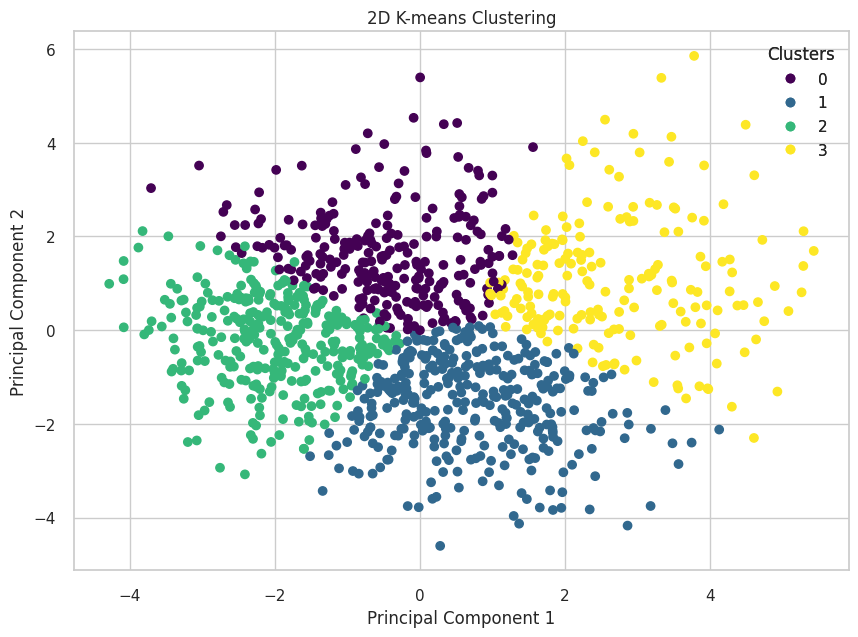

In [233]:
kmeans = KMeans(n_clusters=4, random_state=41)

kmeans.fit(labeled_df_scaled_2d)
labels = kmeans.labels_

fig, ax = plt.subplots(figsize=(10, 7))

scatter = ax.scatter(df.iloc[:, 0], df.iloc[:, 1], c=labels, cmap='viridis')

ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_title('2D K-means Clustering')

legend = ax.legend(*scatter.legend_elements(), title="Clusters")
ax.add_artist(legend)

plt.show()

 Code performs t-SNE (t-distributed Stochastic Neighbor Embedding) on the standardized data (labeled_df_scaled_2d) and visualizes the results in a 2D plot.

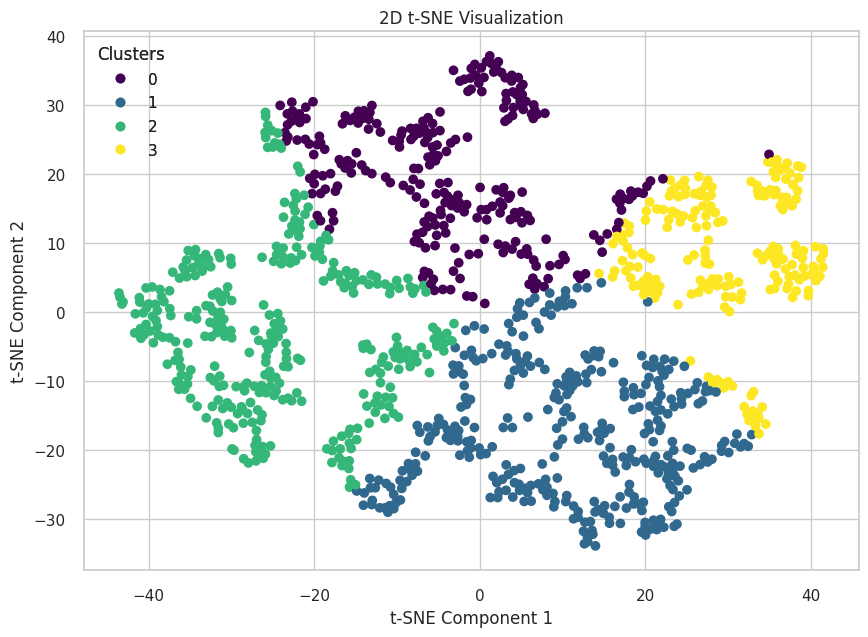

In [234]:
tsne = TSNE(n_components=2, random_state=78)
tsne_results = tsne.fit_transform(labeled_df_scaled_2d)

df_tsne = pd.DataFrame(tsne_results, columns=['TSNE1', 'TSNE2'])

fig, ax = plt.subplots(figsize=(10, 7))
scatter = ax.scatter(df_tsne['TSNE1'], df_tsne['TSNE2'], c=labels, cmap='viridis')
ax.set_xlabel('t-SNE Component 1')
ax.set_ylabel('t-SNE Component 2')
ax.set_title('2D t-SNE Visualization')
legend = ax.legend(*scatter.legend_elements(), title="Clusters")
ax.add_artist(legend)
plt.show()

Code snippet performs UMAP (Uniform Manifold Approximation and Projection) on the standardized data (labeled_df_scaled_2d) and subsequently applies KMeans clustering to the UMAP-transformed data. The results are visualized in a 2D plot.

/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1945: UserWarning:

n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



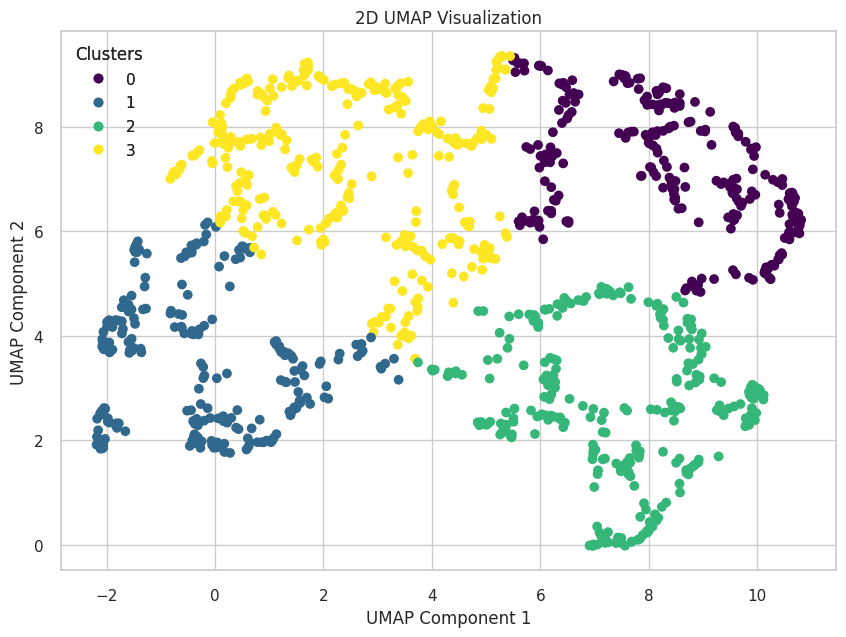

In [235]:
umap_model = umap.UMAP(n_components=2, random_state=42, n_neighbors=25, min_dist=0.07)
umap_results = umap_model.fit_transform(labeled_df_scaled_2d)

df_umap = pd.DataFrame(umap_results, columns=['UMAP1', 'UMAP2'])

kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(df_umap)
labels = kmeans.labels_

fig, ax = plt.subplots(figsize=(10, 7))
scatter = ax.scatter(df_umap['UMAP1'], df_umap['UMAP2'], c=labels, cmap='viridis')
ax.set_xlabel('UMAP Component 1')
ax.set_ylabel('UMAP Component 2')
ax.set_title('2D UMAP Visualization')
legend = ax.legend(*scatter.legend_elements(), title="Clusters")
ax.add_artist(legend)
plt.show()

Applies KMeans clustering to visualize the data in a 3D plot.

/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1945: UserWarning:

n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



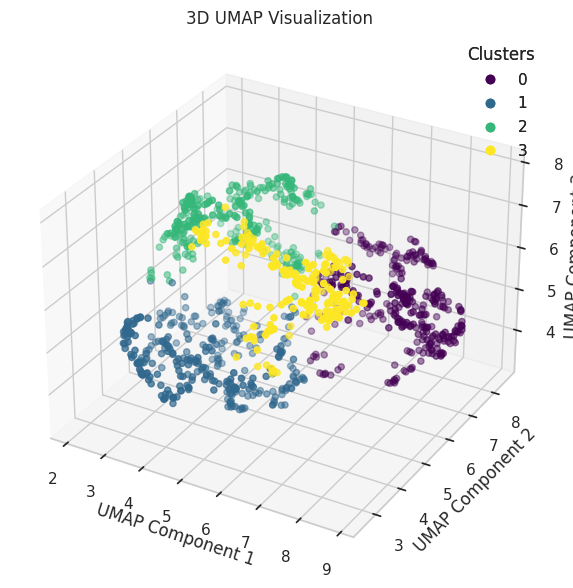

In [236]:
umap_model = umap.UMAP(n_components=3, random_state=42, n_neighbors=25, min_dist=0.07)
umap_results = umap_model.fit_transform(labeled_df_scaled1)

df_umap = pd.DataFrame(umap_results, columns=['UMAP1', 'UMAP2', 'UMAP3'])

kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(df_umap)
labels = kmeans.labels_

fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(df_umap['UMAP1'], df_umap['UMAP2'], df_umap['UMAP3'], c=labels, cmap='viridis')
ax.set_xlabel('UMAP Component 1')
ax.set_ylabel('UMAP Component 2')
ax.set_zlabel('UMAP Component 3')
ax.set_title('3D UMAP Visualization')

legend = ax.legend(*scatter.legend_elements(), title="Clusters")
ax.add_artist(legend)

plt.show()

In [237]:
umap_model = umap.UMAP(n_components=3, random_state=42, n_neighbors=25, min_dist=0.07)
umap_results = umap_model.fit_transform(labeled_df_scaled1)

df_umap = pd.DataFrame(umap_results, columns=['UMAP1', 'UMAP2', 'UMAP3'])

kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(df_umap)
labels = kmeans.labels_

df_umap['Cluster'] = labels.astype(str)

fig = px.scatter_3d(df_umap, x='UMAP1', y='UMAP2', z='UMAP3', color='Cluster',
                    symbol='Cluster', opacity=0.7, size_max=10,
                    title='3D UMAP Visualization with KMeans Clustering')

fig.update_layout(scene=dict(
                    xaxis_title='UMAP Component 1',
                    yaxis_title='UMAP Component 2',
                    zaxis_title='UMAP Component 3'),
                    margin=dict(r=20, l=10, b=10, t=40))

fig.show()

/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1945: UserWarning:

n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



###Cluster interpretation
Assign Cluster Labels

In [238]:
imputed_df_for_fraph['Cluster'] = labels

In [239]:
imputed_df_for_fraph

,Employee_Count,Tech_Company,Mental_Health_Benefits,MH_Coverage_Options,Employer_MH_Discussion,Employer_MH_Resources,Anonymity_Protection,Medical_Leave_Request,MH_Discussion_Consequences,PH_Discussion_Consequences,...,Sought_MH_Treatment,MH_Interference_Effective_Treatment,MH_Interference_Untreated,Age,Gender,Country,Work_Country,Work_Position,Remote_Work,Cluster
0,26-100,1.0,Not eligible for coverage / N/A,No,No,No,I don't know,Very easy,No,No,...,0,Not applicable to me,Not applicable to me,39,Male,United Kingdom,United Kingdom,IT Development,Sometimes,3
1,6-25,1.0,No,Yes,Yes,Yes,Yes,Somewhat easy,No,No,...,1,Rarely,Sometimes,29,Male,United States of America,United States of America,IT Development,Never,1
2,6-25,1.0,No,No,No,No,I don't know,Neither easy nor difficult,Maybe,No,...,1,Not applicable to me,Not applicable to me,38,Male,United Kingdom,United Kingdom,IT Development,Always,0
3,6-25,0.0,Yes,Yes,No,No,No,Neither easy nor difficult,Yes,Maybe,...,1,Sometimes,Sometimes,43,Female,United States of America,United States of America,IT Development,Sometimes,2
4,More than 1000,1.0,Yes,I am not sure,No,Yes,Yes,Somewhat easy,Yes,Yes,...,1,Not applicable to me,Often,42,Male,United Kingdom,United Kingdom,IT Development,Sometimes,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1141,100-500,1.0,I don't know,I am not sure,No,I don't know,I don't know,Somewhat easy,Maybe,No,...,1,Rarely,Often,26,Female,Canada,Canada,Other,Sometimes,0
1142,500-1000,1.0,Yes,No,No,No,Yes,Somewhat easy,No,No,...,1,Rarely,Often,38,Female,United States of America,United States of America,Support,Always,2
1143,100-500,1.0,Yes,Yes,Yes,Yes,I don't know,Somewhat difficult,Maybe,Maybe,...,1,Rarely,Sometimes,52,Male,United States of America,United States of America,IT Development,Sometimes,1
1144,100-500,0.0,I don't know,I am not sure,No,Yes,I don't know,Somewhat difficult,Maybe,No,...,0,Sometimes,Often,30,Female,United States of America,United States of America,DevOps,Sometimes,2


The code snippet creates a set of bar charts where each chart represents the distribution of a feature in the dataset (imputed_df_for_graph) across different clusters (Cluster). Each subplot shows how the feature values are distributed within each cluster, helping to visualize any patterns or differences across clusters.

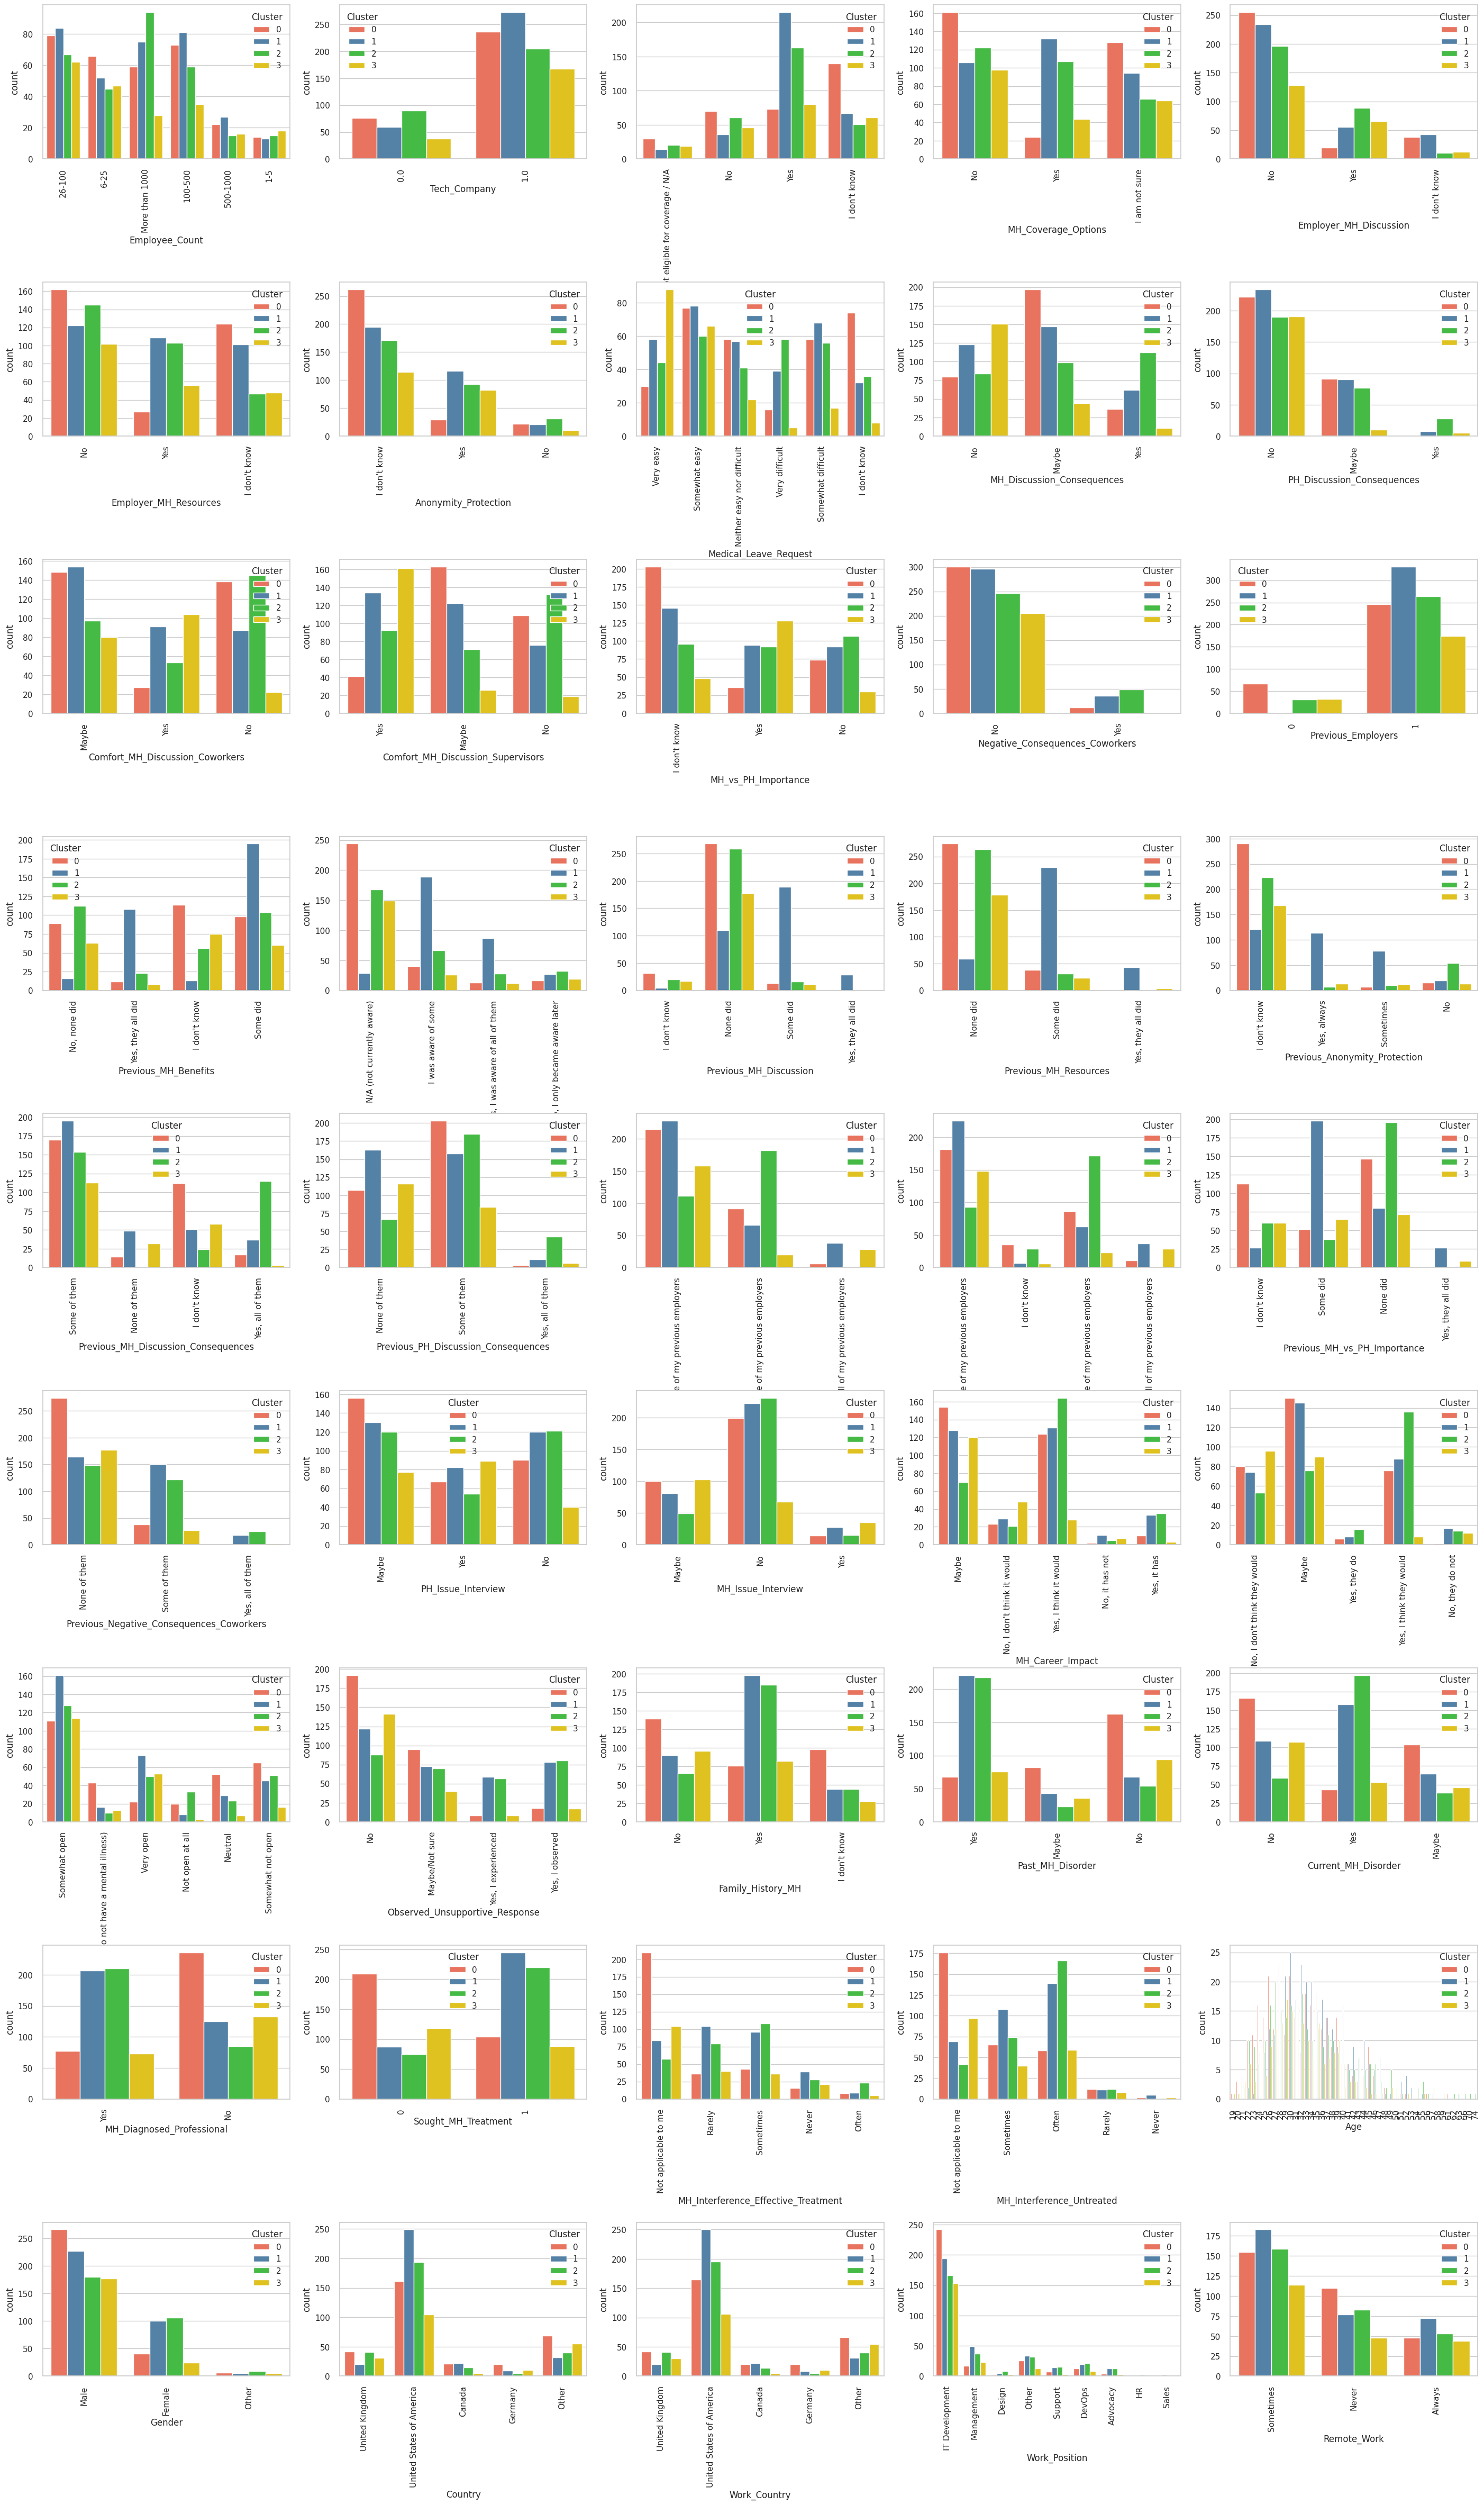

In [240]:
plt.figure(figsize=(35, 65))

palette = ['#FF6347', '#4682B4', '#32CD32', '#FFD700']
for i, column in enumerate(imputed_df_for_fraph.columns):
    if column != 'Cluster':
        plt.subplot(10, 5, i+1)
        sns.countplot(data=imputed_df_for_fraph, x=column, hue='Cluster', palette=palette)
        plt.xticks(rotation=90)
        plt.subplots_adjust(wspace=0.2, hspace=0.8)



plt.savefig('cluster-bar-chart.png')




###Based on the provided histograms and the clustering analysis, here's a description of each cluster, summarizing the main points:

###Cluster 0:
Employee Count: Predominantly smaller companies (10-100 employees).
Mental Health Coverage: Poor coverage for mental health.
Discussion: Less likely to discuss mental health issues with employers.
Comfort in Discussing with Coworkers/Supervisors: Low comfort level.
Previous Employers' Support: Poor support for mental health issues.
Diagnosed Mental Illness: Higher rate of diagnosed mental illness.
Country: Mixed representation from various countries.
###Cluster 1:
Employee Count: Mid-sized companies (100-1000 employees).
Mental Health Coverage: Best mental health coverage.
Discussion: More open to discussing mental health issues with employers.
Comfort in Discussing with Coworkers/Supervisors: Good comfort level.
Previous Employers' Support: Moderate support for mental health issues.
Family History of Mental Illness: Higher levels.
Diagnosed Mental Illness: Moderate rate of diagnosed mental illness.
Gender: Slightly more male-dominated.
###Cluster 2:
Employee Count: Larger companies (1000+ employees).
Mental Health Coverage: Good mental health coverage.
Discussion: Mostly open to discussing mental health issues with employers.
Comfort in Discussing with Coworkers/Supervisors: Low comfort level.
Previous Employers' Support: Good support for mental health issues.
Diagnosed Mental Illness: Lower rate of diagnosed mental illness.
Gender: More balanced representation.
Country: Predominantly from specific countries, likely developed regions.
###Cluster 3:
Employee Count: Mixed but tends towards smaller companies (10-100 employees).
Mental Health Coverage: Limited mental health coverage.
Discussion: Reluctant to discuss mental health issues with employers.
Comfort in Discussing with Coworkers/Supervisors: High comfort level.
Previous Employers' Support: Very poor support for mental health issues.
Diagnosed Mental Illness: Higher rate of diagnosed mental illness.
Gender: Significant difference between male and female representation, with more males.
Country: Mixed representation from various countries.